In [6]:
import keras
from keras.layers import Flatten , Dense
from keras import Sequential

In [7]:
(x_train , y_train) , (x_test , y_test) = keras.datasets.mnist.load_data()

In [9]:
x_train = x_train/255
x_test = x_test/255

5


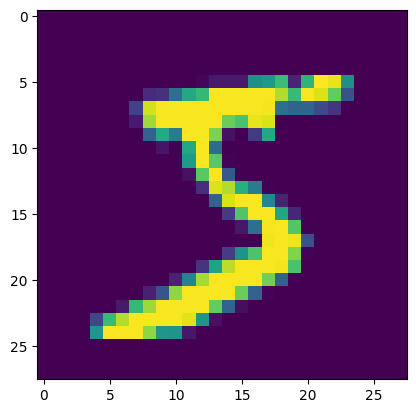

In [12]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print(y_train[0])

In [15]:
model  = Sequential()
model.add(Flatten( input_shape =(28 , 28)))
model.add(Dense(128 , activation = 'relu'))
model.add(Dense(62 , activation = 'relu'))
model.add(Dense(10 , activation = 'softmax'))

In [16]:
model.compile(loss = 'sparse_categorical_crossentropy' , optimizer = 'Adam' , metrics = ['accuracy'])

In [17]:
history = model.fit(x_train , y_train , epochs= 20 , validation_split = 0.2)

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2636 - accuracy: 0.9238 - val_loss: 0.1366 - val_accuracy: 0.9619
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1088 - accuracy: 0.9678 - val_loss: 0.1144 - val_accuracy: 0.9659
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0760 - accuracy: 0.9770 - val_loss: 0.0985 - val_accuracy: 0.9715
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0580 - accuracy: 0.9821 - val_loss: 0.0849 - val_accuracy: 0.9749
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0449 - accuracy: 0.9856 - val_loss: 0.0894 - val_accuracy: 0.9762
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0363 - accuracy: 0.9877 - val_loss: 0.0973 - val_accuracy: 0.9738
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0291 - accuracy: 0.9907 - val_loss: 0.1052 - val_accuracy:

In [18]:
y_prob = model.predict(x_test)
y_pred = y_prob.argmax(axis = 1)

313/313 [==============================] - 0s 943us/step


In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)

0.9792

1/1 [==============================] - 0s 47ms/step
[6]


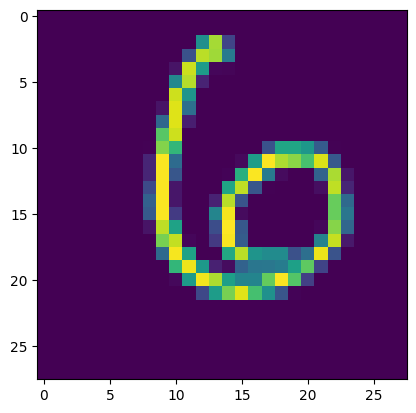

In [21]:
plt.imshow(x_test[100])
y_prob = model.predict(x_test[100].reshape(1 , -1))
y_pred = y_prob.argmax(axis = 1)
print(y_pred)

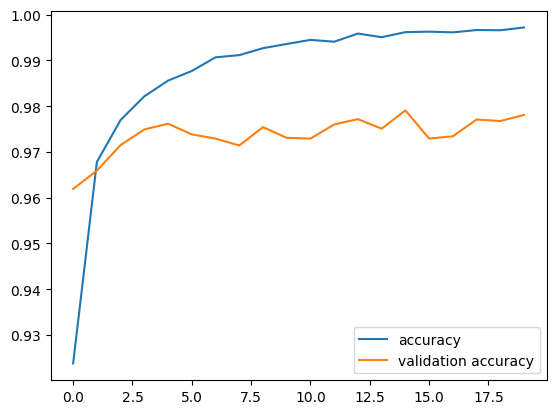

In [23]:
plt.plot(history.history['accuracy'] , label = 'accuracy')
plt.plot(history.history['val_accuracy'] , label = 'validation accuracy')
plt.legend()